# Use DallE-3 to Generate an Image


In [1]:
!pip install -q openai==1.107.0 requests==2.32.4 pillow==11.3.0

In [2]:
import os

# Set the "OPENAI_API_KEY" in the Python environment. Will be used by OpenAI client later.
# os.environ["OPENAI_API_KEY"] = "[OPENAI_API_KEY]"

from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [3]:
from openai import OpenAI

client = OpenAI()

In [4]:
response = client.images.generate(
    model="dall-e-3",
    prompt="A computer scientist wearing a coat implementing a neural network while sitting behind a computer",
    size="1024x1024",
    quality="standard",
    n=1,
)

In [5]:
response

ImagesResponse(created=1758353211, background=None, data=[Image(b64_json=None, revised_prompt='A middle-eastern computer scientist, wearing a professional lab coat, is concentrated while implementing a neural network code on their computer. The setting is a well-lit modern office, a cluster of servers can be seen in the background. They are typing intensely, deeply immersed in the complex world of machine learning algorithms. The computer screen shows lines of complex code, hinting at the intricacy of the task at hand.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-7B3VYtCFt3BduG3PRIJUl7pf/user-uApOpZZWIJLowuVrUxHnWdCE/img-QObvQTJo3pNEylAIQL75ypd9.png?st=2025-09-20T06%3A26%3A51Z&se=2025-09-20T08%3A26%3A51Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=cc612491-d948-4d2e-9821-2683df3719f5&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-09-19T14%3A40%3A33Z&ske=2025-09-20T14%3A40%3A33Z&sks=b&skv=2024-08-04&sig=wmuypxeoE04nm8/MYpXrKqW9JIAl6F4FRQpnQRhciI

In [6]:
from PIL import Image
import requests
from io import BytesIO

# Fetch the image
response = requests.get(response.data[0].url)
response.raise_for_status()  # Check if the request was successful

# Open the image with Pillow
image = Image.open(BytesIO(response.content))

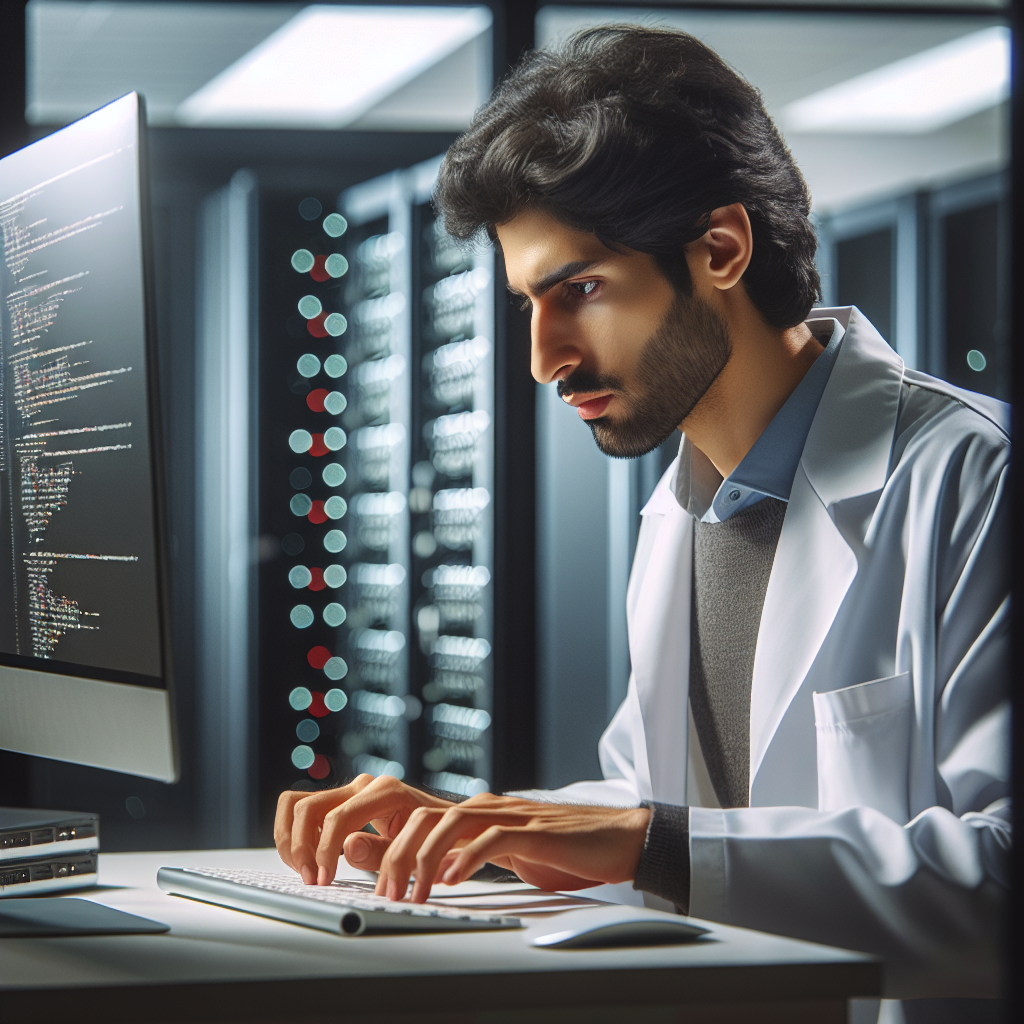

In [7]:
image

# ElevenLabs to Generate Voice


In [8]:
!pip install -q elevenlabs==2.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 955.6/955.6 kB 10.0 MB/s eta 0:00:00


In [9]:
# Set the "ELEVENLABS_API_KEY" as a variable. Will be used by ElevenLabs client later.
# ELEVENLABS_API_KEY = "[ELEVENLABS_API_KEY]"

from google.colab import userdata
ELEVENLABS_API_KEY = userdata.get('Elevanlabs_API')

In [10]:
from elevenlabs.client import ElevenLabs

client = ElevenLabs(api_key=ELEVENLABS_API_KEY)

In [11]:
text = "Artificial Intelligence is the future!"

In [12]:
# Calling the text_to_speech conversion API with detailed parameters
response = client.text_to_speech.convert(
    voice_id="pNInz6obpgDQGcFmaJgB",  # Adam pre-made voice
    text=text,
    model_id="eleven_turbo_v2",  # use the turbo model for low latency, for other languages use the `eleven_multilingual_v2`
)

In [13]:
# Generating a unique file name for the output MP3 file
save_file_path = "voice.mp3"

In [14]:
# Writing the audio to a file
with open(save_file_path, "wb") as f:
    for chunk in response:
        if chunk:
            f.write(chunk)

print(f"{save_file_path}: A new audio file was saved successfully!")

voice.mp3: A new audio file was saved successfully!


In [15]:
from IPython.display import Audio, display

display(Audio(save_file_path, autoplay=True))